In [3]:
from textblob import TextBlob
import pandas as pd
import re
import string
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('C:/Users/ok/Desktop/Week_0/week-0/data/all_data.csv', encoding='utf-8')

In [6]:
data['cleaned'] = data['msg_content']

In [7]:
def data_preprocessor(data):
    
    #this function preprocesses the given data's message and create a new column 'cleaned' for topic and sentiment analysis
    data['cleaned'] = data['cleaned'].astype(str) #convertt to string
    data['cleaned'] = data['cleaned'].apply(lambda x: x.lower()) #convert to lower case
    data['cleaned'] = data['cleaned'].apply(lambda x: re.sub(r'http\S+', '', x)) # to remove links
    data['cleaned']= data['cleaned'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation))) #remove punctuations
    data['cleaned'] = data['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) #remove stopwords
    data['cleaned'] = data['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3])) #remove words with length less than 3
    data['cleaned'] = data['cleaned'].apply(lambda x: re.sub(r'\d+', '', x))
    
    return data

In [8]:
data2 = data_preprocessor(data)

In [9]:

sentiments = data['cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Add the sentiment scores as a new column in the dataframe
data['sentiment_score'] = sentiments

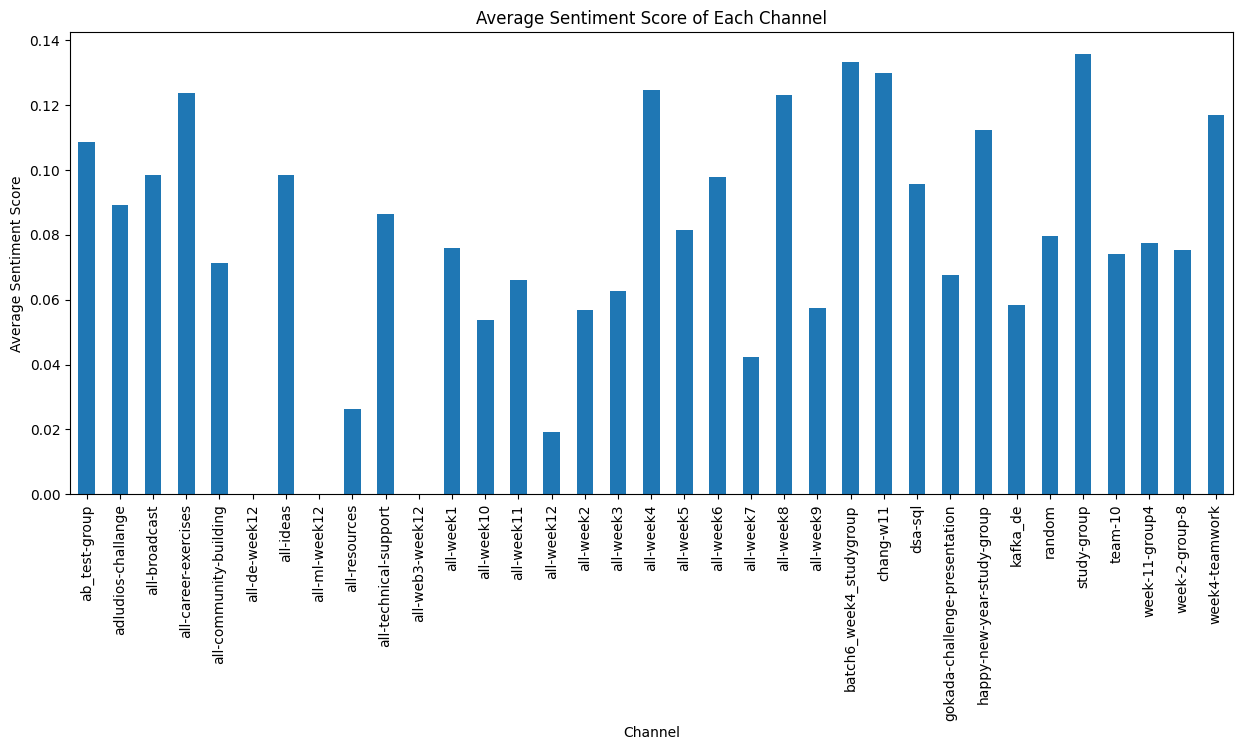

In [22]:
import matplotlib.pyplot as plt

average_sentiment = data.groupby('channel')['sentiment_score'].mean()

average_sentiment.plot(kind='bar', figsize=(15, 6))
plt.title('Average Sentiment Score of Each Channel')
plt.xlabel('Channel')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.show()
